In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

In [2]:
import collections

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [4]:
def pkl_loader(file_name):
    with open(file_name, 'rb') as f:
        objct = pkl.load(f, encoding = 'bytes')
    return(objct)

In [5]:
allColNames = pkl_loader('/Users/wyz0214/Downloads/Capstone/allColNames.p')
colHeader, colSlot = allColNames['columnHeaders'], allColNames['columnSlots']
allTrainTS = pkl_loader('/Users/wyz0214/Downloads/Capstone/allTrainTS.p')
#allTrainTS[some_index] = "2darray(len(colHeader)*len(colSlots))"
allIDs = pkl_loader('/Users/wyz0214/Downloads/Capstone/allIDs.p')
allTgts = pkl_loader('/Users/wyz0214/Downloads/Capstone/allTgts.p')
#allIDs[some_index] = "IDOfThisData"
#allTgts[some_index] = "TargetOfThisData"

In [6]:
allTrainTS[10].shape

(23, 15)

In [7]:
len(colHeader)

23

In [8]:
len(colSlot)

15

In [9]:
colSlot

['avg0to1',
 'avg1to3',
 'avg3to5',
 'avg5to7',
 'avg7to10',
 'avg10to13',
 'avg13to16',
 'avg16to19',
 'avg19to24',
 'avg24to27',
 'avg27to33',
 'avg33to42',
 'avg42to54',
 'avg54to66',
 'avg66to78']

In [10]:
colHeader

['Vital: BP',
 'Vital: Wt for Len Percentile',
 'Vital: Wt for Length ZScore',
 'Vital: PEF',
 'Vital: PainScale',
 'Vital: BMI',
 'Vital: Ht Percentile',
 'Vital: Ht',
 'Vital: HC Percentile',
 'Vital: Temp',
 'Vital: SpO2',
 'Vital: Vision',
 'Vital: Wt Change',
 'Vital: RR',
 'Vital: HR',
 'Vital: PL',
 'Vital: Wt',
 'Vital: BMI Percentile',
 'Vital: Wt Percentile',
 'Vital: Hearing',
 'Vital: Pre-gravid Wt',
 'Vital: HC',
 'Vital: Fundal Ht']

In [11]:
allTrainTS[16][:3]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  85.        ,  45.66666667],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.20698137,   0.        ]])

In [12]:
allTgts[:10]

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

In [13]:
train_bmi = [allTrainTS[i][17] for i in range(len(allTrainTS))]

In [14]:
train_bmi = np.array(train_bmi)

In [15]:
allTgts = np.array(allTgts, dtype=bool)

In [16]:
allTgts[:,3].shape

(11494,)

In [35]:
np.sum(allTgts[:,3])

2278

In [17]:
train_bmi.shape

(11494, 15)

# PCA and T-SNE

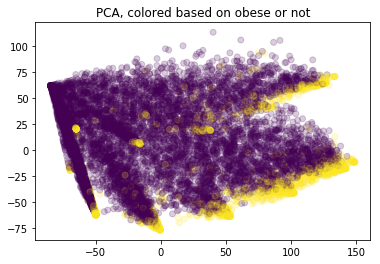

In [19]:
pca2 = PCA(2)
PCA2_hid_01 = pca2.fit_transform(train_bmi)

fig_01norm = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = allTgts[:,3], alpha=0.2)
plt.title('PCA, colored based on obese or not')
plt.show()

In [38]:
# Try T_SNE
from sklearn.manifold import TSNE

Embedded_X_Gnorm = TSNE(n_components = 2).fit_transform(train_bmi)
print(Embedded_X_Gnorm.shape)

(11494, 2)


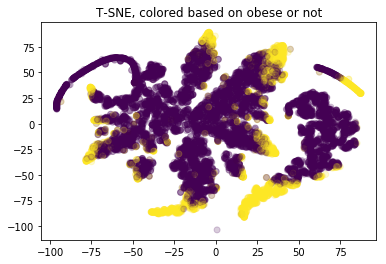

In [39]:
fig_TSNE1 = plt.figure()
plt.scatter(Embedded_X_Gnorm[:, 0], Embedded_X_Gnorm[:, 1], c = allTgts[:,3], alpha = 0.2)
plt.title('T-SNE, colored based on obese or not')
plt.show()

# Clustering

# Final approach

In [23]:
ward_labels = []
for num_cluster in range(1, 11):
    ward = AgglomerativeClustering(n_clusters = num_cluster, linkage = 'ward').fit(train_bmi)
    ward_labels.append(ward.labels_)

In [32]:
gmm_labels = []
for num_cluster in range(1, 11):
    gmm = GaussianMixture(n_components=num_cluster).fit(train_bmi)
    labels = gmm.predict(train_bmi)
    gmm_labels.append(labels)

In [34]:
np.sum(allTgts[:,3])

2278

In [29]:
# Check the in-clutster obese/non-obese ratio of ward clustering
for ward_label in ward_labels:
    ward_unique, ward_counts = np.unique(ward_label, return_counts = True)
    print ("num clusters: " + str(len(ward_unique)))
    ward_count_dict = dict(zip(ward_unique, ward_counts))

    ward_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
    for i in range(len(ward_label)):
        ward_content_check[ward_label[i]][allTgts[:,3][i]] += 1
    for label in sorted(ward_unique):
        print ("clsuter label:" + str(label))
        print ("0:" + str(ward_content_check[label][0.0]))
        print ("1:" + str(ward_content_check[label][1.0]))
    print ("================")

num clusters: 1
clsuter label:0
0:9216
1:2278
num clusters: 2
clsuter label:0
0:4487
1:1542
clsuter label:1
0:4729
1:736
num clusters: 3
clsuter label:0
0:4729
1:736
clsuter label:1
0:2687
1:834
clsuter label:2
0:1800
1:708
num clusters: 4
clsuter label:0
0:2687
1:834
clsuter label:1
0:3025
1:198
clsuter label:2
0:1800
1:708
clsuter label:3
0:1704
1:538
num clusters: 5
clsuter label:0
0:1800
1:708
clsuter label:1
0:3025
1:198
clsuter label:2
0:1875
1:519
clsuter label:3
0:1704
1:538
clsuter label:4
0:812
1:315
num clusters: 6
clsuter label:0
0:1128
1:324
clsuter label:1
0:3025
1:198
clsuter label:2
0:1875
1:519
clsuter label:3
0:1704
1:538
clsuter label:4
0:812
1:315
clsuter label:5
0:672
1:384
num clusters: 7
clsuter label:0
0:1875
1:519
clsuter label:1
0:3025
1:198
clsuter label:2
0:810
1:207
clsuter label:3
0:1704
1:538
clsuter label:4
0:812
1:315
clsuter label:5
0:672
1:384
clsuter label:6
0:318
1:117
num clusters: 8
clsuter label:0
0:1405
1:321
clsuter label:1
0:3025
1:198
clsuter

In [40]:
# Check the in-clutster obese/non-obese ratio of KMeans clustering
for kmeans_label in gmm_labels:
    kmeans_unique, kmeans_counts = np.unique(kmeans_label, return_counts = True)
    print ("num clusters: " + str(len(kmeans_unique)))
    kmeans_count_dict = dict(zip(kmeans_unique, kmeans_counts))

    kmeans_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
    for i in range(len(kmeans_label)):
        kmeans_content_check[kmeans_label[i]][allTgts[:,3][i]] += 1
    for label in sorted(kmeans_unique):
        print ("clsuter label:" + str(label))
        print ("0:" + str(kmeans_content_check[label][0.0]))
        print ("1:" + str(kmeans_content_check[label][1.0]))
    print ("================")

num clusters: 1
clsuter label:0
0:9216
1:2278
num clusters: 2
clsuter label:0
0:8652
1:2147
clsuter label:1
0:564
1:131
num clusters: 3
clsuter label:0
0:6560
1:1614
clsuter label:1
0:2649
1:663
clsuter label:2
0:7
1:1
num clusters: 4
clsuter label:0
0:561
1:130
clsuter label:1
0:6003
1:1484
clsuter label:2
0:2645
1:663
clsuter label:3
0:7
1:1
num clusters: 5
clsuter label:0
0:2645
1:663
clsuter label:1
0:4
1:1
clsuter label:2
0:6003
1:1480
clsuter label:3
0:4
1:4
clsuter label:4
0:560
1:130
num clusters: 6
clsuter label:0
0:4597
1:1170
clsuter label:1
0:7
1:1
clsuter label:2
0:2645
1:663
clsuter label:3
0:4
1:3
clsuter label:4
0:558
1:127
clsuter label:5
0:1405
1:314
num clusters: 7
clsuter label:0
0:4113
1:1029
clsuter label:1
0:7
1:1
clsuter label:2
0:847
1:231
clsuter label:3
0:560
1:133
clsuter label:4
0:2695
1:673
clsuter label:5
0:991
1:211
clsuter label:6
0:3
1:0
num clusters: 8
clsuter label:0
0:4
1:0
clsuter label:1
0:2645
1:663
clsuter label:2
0:1468
1:366
clsuter label:3
0:

# Previous experiments

In [28]:
# Perform Hierarchical Clustering using AgglomerativeClustering in sklearn
# Try different linkage criterions
complete = AgglomerativeClustering(n_clusters = 2, linkage = 'complete').fit(train_bmi)
average = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(train_bmi)
ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward').fit(train_bmi)
    
complete_label = complete.labels_
average_label = average.labels_
ward_label = ward.labels_

In [39]:
complete_label.shape

(11494,)

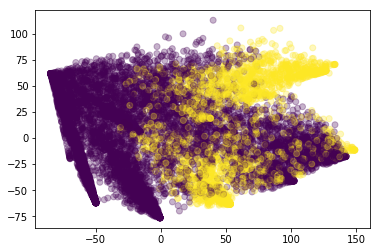

In [31]:
fig_unclustered_Gnorm_total = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = complete_label, alpha = 0.3)
plt.show()

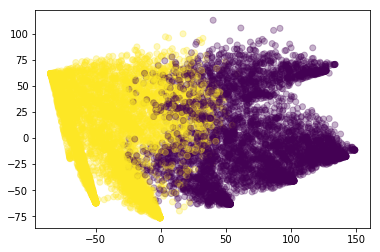

In [32]:
fig_unclustered_Gnorm_ward = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = average_label, alpha = 0.3)
plt.show()

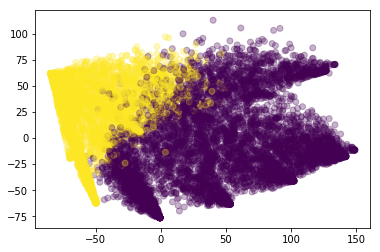

In [33]:
fig_unclustered_Gnorm_avg = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = ward_label, alpha = 0.3)
plt.show()

In [284]:
# Check the content of ward clustering
ward_unique, ward_counts = np.unique(labels, return_counts = True)
ward_count_dict = dict(zip(ward_unique, ward_counts))
print (ward_count_dict)

ward_content_check = collections.defaultdict(lambda: collections.defaultdict(int))
for i in range(len(labels)):
    ward_content_check[labels[i]][allTgts[:,3][i]] += 1
print (ward_content_check)

{False: 10799, True: 695}
defaultdict(<function <lambda> at 0x107d54620>, {False: defaultdict(<class 'int'>, {False: 8652, True: 2147}), True: defaultdict(<class 'int'>, {True: 131, False: 564})})


In [25]:
from sklearn.mixture import GaussianMixture

In [35]:
gmm = GaussianMixture(n_components=2).fit(train_bmi)
labels = gmm.predict(train_bmi)

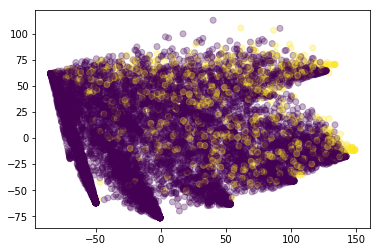

In [36]:
fig_gmm = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = labels, alpha = 0.3)
plt.show()

In [530]:
np.sum(labels)

695

In [531]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
labels = np.array(labels, dtype=bool)

In [41]:
Train_np = np.array(allTrainTS)

In [42]:
cluster1 = Train_np[labels]

In [43]:
cluster1.shape

(695, 23, 15)

In [44]:
cluster2 = Train_np[~labels]

In [45]:
#with open('target2.p', 'wb') as handle:
#    pkl.dump(tgt_2, handle)

In [46]:
tgt_1 = allTgts[labels, 3]
tgt_2 = allTgts[~labels, 3]

In [50]:
np.sum(tgt_2)

2147

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import pylab
from pykalman import KalmanFilter
from pykalman.datasets import load_robot
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal

from scipy import linalg

%matplotlib inline

In [27]:
nx = np.array([cluster1[i][16] for i in range(len(cluster1))])
ny = np.array([cluster1[i][7] for i in range(len(cluster1))])

nx = nx.reshape((len(colSlot)*len(cluster1),))
ny = ny.reshape((len(colSlot)*len(cluster1),))

In [28]:
data = np.array([nx,ny]).T

In [29]:
data = data[np.argsort(data[:, 0])]

In [30]:
data.shape

(10425, 2)

In [157]:
# Data Visualiztion
def plot_kalman(nx, ny, kx, ky, plot_type, label):
    """Plot the trajectory and estimates if available."""
    if kx is not None and ky is not None:
        pylab.plot(nx,ny,'b.',kx,ky, plot_type)
    else:
        pylab.plot(nx,ny,'b.')

    pylab.xlabel('Age (months)')
    pylab.ylabel('BMI')
    pylab.title(label)
    pylab.legend(('Measured', 'Kalman Smooth'))

    pylab.show()

def visualize_line_plot(data, xlabel, ylabel, title):
    """Line plot utility function."""

    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)
    pylab.title(title)
    pylab.show()

In [158]:
# Data Visualiztion
def plot_kalman_tgts(nx, ny, kx, ky, mx, my, label, al):
    """Plot the trajectory and estimates if available."""
        
    pylab.plot(nx,ny,'b.',mx, my, 'g.', alpha=al)
    pylab.plot(kx,ky, 'r-')
    pylab.xlabel('Age (months)')
    pylab.ylabel('BMI')
    pylab.title(label)
    pylab.legend(('Obese', 'Normal', 'Kalman Smooth'))
    
    plt.show()

In [63]:
def print_parameters(kf_model, need_params=None):
    """
    Function that prints out the parameters for a Kalman Filter
    @param - kf_model : the model object
    @param - need_params : a list of string
    """
    if need_params is None:
        need_params = ['transition_matrices', 'observation_matrices', 'transition_offsets', 
                  'observation_offsets', 'transition_covariance', 
                  'observation_covariance', 'initial_state_mean', 'initial_state_covariance']
    for param in need_params: 
        print("{0} = {1}, shape = {2}\n".format(param, getattr(kf_model, param), getattr(kf_model, param).shape))

In [34]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  2.19108040e-02   5.83805344e-03]
 [  5.83805344e-03   2.57893296e+01]], shape = (2, 2)

observation_covariance = [[  1.48300535e-02   2.19230334e-03]
 [  2.19230334e-03   1.69221978e+02]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[  9.43198385e-03   1.32994978e-05]
 [  1.32994978e-05   3.67947335e-01]], shape = (2, 2)



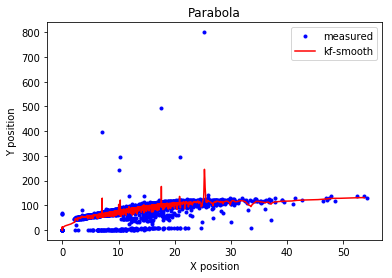

In [35]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "kf-smooth")

In [54]:
nx = np.array([cluster2[i][16] for i in range(len(cluster2))])
ny = np.array([cluster2[i][7] for i in range(len(cluster2))])

nx = nx.reshape((len(colSlot)*len(cluster2),))
ny = ny.reshape((len(colSlot)*len(cluster2),))

In [55]:
outliers = nx<100

In [56]:
outliers

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [57]:
nx = nx[outliers]
ny = ny[outliers]

In [58]:
nx.shape

(161983,)

In [59]:
data = np.array([nx,ny]).T

In [60]:
data = data[np.argsort(data[:, 0])]

In [61]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=5)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  3.94140285e-02  -4.52127649e-03]
 [ -4.52127649e-03   3.59213978e+01]], shape = (2, 2)

observation_covariance = [[  2.91834473e-02  -1.46008409e-02]
 [ -1.46008409e-02   2.09313963e+02]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[  1.87680530e-02  -2.69631896e-05]
 [ -2.69631896e-05   3.72673292e-01]], shape = (2, 2)



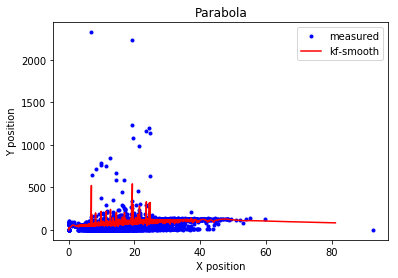

In [62]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "kf-smooth")

In [474]:
colAge = [0.5, 1.5, 4, 6, 8.5, 11.5, 14.5, 17.5, 21.5, 25.5, 30., 37.5, 48., 60., 72.]

In [475]:
nx = np.tile(colAge, len(cluster1))
ny = np.array([cluster1[i][16] for i in range(len(cluster1))])


ny = ny.reshape((len(colSlot)*len(cluster1),))
#ny = ny.reshape((len(colSlot)*len(cluster1),))

In [476]:
ny[:50]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        16.3293264 ,  16.1025302 ,  15.27094413,  18.67288713,
        21.18924497,  27.30626248,  29.78590093,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  10.94291665,
        11.07521443,  12.7005872 ,  13.3809758 ,  15.60357856,
        18.08699695,  21.92363267,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  12.2469948 ,  12.2469948 ,
         0.        ,   0.        ,  16.3293264 ,  18.143696  ,
        19.88246687,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [477]:
outliers = (ny<100) & (ny>1.)

In [478]:
nx = nx[outliers]
ny = ny[outliers]

In [479]:
data = np.array([nx,ny]).T

In [480]:
data = data[np.argsort(data[:, 0])]

In [481]:
data.shape

(9189, 2)

In [482]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[ 0.05330551  0.00363691]
 [ 0.00363691  1.00483744]], shape = (2, 2)

observation_covariance = [[ 0.03102931  0.00843267]
 [ 0.00843267  5.03642494]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[ 0.01296715  0.00032735]
 [ 0.00032735  0.18279973]], shape = (2, 2)



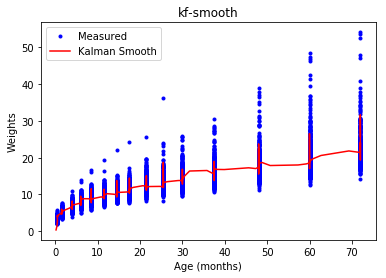

In [483]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "kf-smooth")

In [486]:
idy = np.tile(tgts_4, len(colAge))

In [ ]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Obese")

In [122]:
nx = np.tile(colAge, len(cluster2))
ny = np.array([cluster2[i][16] for i in range(len(cluster2))])


ny = ny.reshape((len(colSlot)*len(cluster2),))

In [123]:
outliers = (ny<100) & (ny>1.)

In [124]:
nx = nx[outliers]
ny = ny[outliers]

In [125]:
data = np.array([nx,ny]).T

In [126]:
data = data[np.argsort(data[:, 0])]

In [127]:
data.shape

(64352, 2)

In [128]:
kf2 = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf2.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf2.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf2)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  2.28050226e-02   6.84782937e-04]
 [  6.84782937e-04   1.35365292e+00]], shape = (2, 2)

observation_covariance = [[  1.61177619e-02   8.26230187e-04]
 [  8.26230187e-04   6.98392989e+00]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[  9.67471858e-03   3.36278853e-05]
 [  3.36278853e-05   2.10745784e-01]], shape = (2, 2)



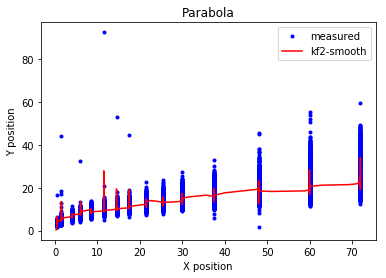

In [129]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf2.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "kf2-smooth")

# Hierachical

In [52]:
complete_label = np.array(complete_label, dtype=bool)

In [53]:
hcluster1 = Train_np[complete_label]

In [54]:
hcluster2 = Train_np[~complete_label]

In [75]:
htgt_1 = allTgts[complete_label, 3]
htgt_2 = allTgts[~complete_label, 3]

In [212]:
colAge = [0.5, 1.5, 4, 6, 8.5, 11.5, 14.5, 17.5, 21.5, 25.5, 30., 37.5, 48., 60., 72.]

In [213]:
nx = np.tile(colAge, len(hcluster1))
ny = np.array([hcluster1[i][5] for i in range(len(hcluster1))])


ny = ny.reshape((len(colSlot)*len(hcluster1),))

In [214]:
outliers = (ny<40) & (ny>=1.)

In [215]:
np.sum(~outliers)

11803

In [216]:
nx = nx[outliers]
ny = ny[outliers]

In [217]:
data = np.array([nx,ny]).T

In [218]:
data = data[np.argsort(data[:, 0])]

In [219]:
data.shape

(20387, 2)

In [220]:
kf2 = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf2.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf2.initial_state_mean = np.array([0, 10])

# Print the parameters
print_parameters(kf2)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  3.35524609e-02   5.64539199e-04]
 [  5.64539199e-04   7.31984425e-01]], shape = (2, 2)

observation_covariance = [[  2.16546210e-02  -1.59701202e-04]
 [ -1.59701202e-04   3.15222752e+00]], shape = (2, 2)

initial_state_mean = [ 0 10], shape = (2,)

initial_state_covariance = [[  1.09369504e-02   8.47693789e-06]
 [  8.47693789e-06   1.46339622e-01]], shape = (2, 2)



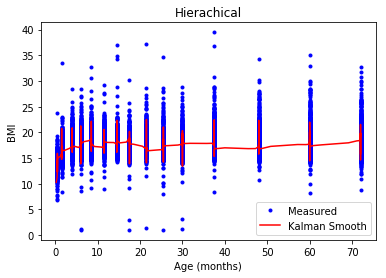

In [221]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf2.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Hierachical")

In [222]:
idy = np.tile(htgt_1, len(colAge))

In [224]:
idy = idy[outliers]

In [226]:
mx = nx*(~idy)
my = ny*(~idy)

In [228]:
nx = nx*idy
ny = ny*idy

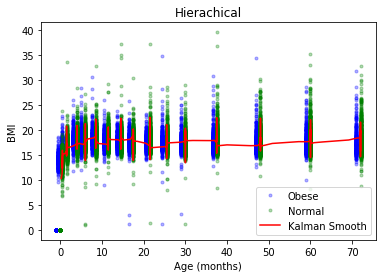

In [230]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Hierachical", .3)

In [264]:
nx = np.tile(colAge, len(hcluster2))
ny = np.array([hcluster2[i][5] for i in range(len(hcluster2))])


ny = ny.reshape((len(colSlot)*len(hcluster2),))

In [265]:
outliers = (ny<40) & (ny>=1.)

In [266]:
nx = nx[outliers]
ny = ny[outliers]

In [267]:
data = np.array([nx,ny]).T

In [268]:
data = data[np.argsort(data[:, 0])]

In [269]:
data.shape

(52233, 2)

In [270]:
kf2 = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf2.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf2.initial_state_mean = np.array([0, 10])

# Print the parameters
print_parameters(kf2)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  2.39466501e-02  -3.39412919e-05]
 [ -3.39412919e-05   8.14584419e-01]], shape = (2, 2)

observation_covariance = [[  1.67264217e-02  -2.41428999e-04]
 [ -2.41428999e-04   3.63485794e+00]], shape = (2, 2)

initial_state_mean = [ 0 10], shape = (2,)

initial_state_covariance = [[  9.81604571e-03  -9.07286718e-06]
 [ -9.07286718e-06   1.57198422e-01]], shape = (2, 2)



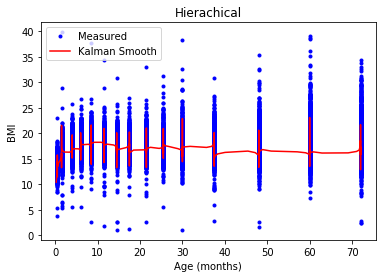

In [271]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf2.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Hierachical")

In [272]:
idy = np.tile(htgt_2, len(colAge))

In [273]:
idy = idy[outliers]

In [274]:
mx = nx*(~idy)
my = ny*(~idy)

In [275]:
nx = nx*idy
ny = ny*idy

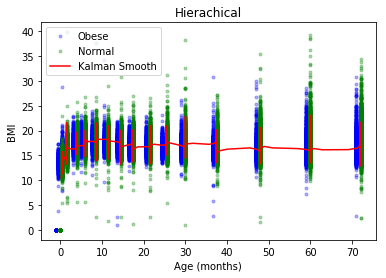

In [276]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Hierachical", 0.3)

In [31]:
import GPy

In [35]:
nx = nx.reshape((len(nx),1))
ny = ny.reshape((len(ny),1))

In [37]:
ny.shape

(10425, 1)

In [449]:
# Build sample points and values:
kernel = GPy.kern.Linear(input_dim=1, variances=1.)
m = GPy.models.GPRegression(nx, ny, kernel)
# This step estimates maximum likelihood values for the kernel parameters:
_ = m.optimize(max_iters=1, optimizer='lbfgs')

#_ = m.plot(plot_density=True, plot_limits=[0., 80.0])
#_ = m.plot_samples(samples=10, plot_limits=[-5.0, 5.0])

# Binning

In [319]:
train_bmi = [allTrainTS[i][5] for i in range(len(allTrainTS))]

In [320]:
train_bmi = np.array(train_bmi)

In [321]:
train_bmi.shape

(11494, 15)

In [322]:
Train_np = np.array(allTrainTS)

In [323]:
group_1 = Train_np[train_bmi[:,8] <= 18.5]
group_2 = Train_np[(train_bmi[:,8] > 18.5) & (train_bmi[:,8] <= 25)]
group_3 = Train_np[(train_bmi[:,8] > 25) & (train_bmi[:,8] <= 30)]
group_4 = Train_np[train_bmi[:,8] > 30]

In [324]:
tgts_1 = allTgts[train_bmi[:,8] <= 18.5, 3]
tgts_2 = allTgts[(train_bmi[:,8] > 18.5) & (train_bmi[:,8] <= 25), 3]
tgts_3 = allTgts[(train_bmi[:,8] > 25) & (train_bmi[:,8] <= 30), 3]
tgts_4 = allTgts[train_bmi[:,8] > 30, 3]

In [328]:
group_4.shape

(2, 23, 15)

In [329]:
np.sum(tgts_4)

0

In [330]:
colAge = [0.5, 1.5, 4, 6, 8.5, 11.5, 14.5, 17.5, 21.5, 25.5, 30., 37.5, 48., 60., 72.]

In [425]:
nx = np.tile(colAge, len(group_1))
ny = np.array([group_1[i][16] for i in range(len(group_1))])


ny = ny.reshape((len(colSlot)*len(group_1),))

In [426]:
outliers = (ny<100) & (ny>1.)

In [427]:
nx = nx[outliers]
ny = ny[outliers]

In [428]:
data = np.array([nx,ny]).T

In [429]:
data = data[np.argsort(data[:, 0])]

In [430]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[  2.29369214e-02   6.59285833e-04]
 [  6.59285833e-04   1.24736554e+00]], shape = (2, 2)

observation_covariance = [[  1.61884218e-02   9.98789337e-04]
 [  9.98789337e-04   6.34955155e+00]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[  9.69114551e-03   3.94822769e-05]
 [  3.94822769e-05   2.02651782e-01]], shape = (2, 2)



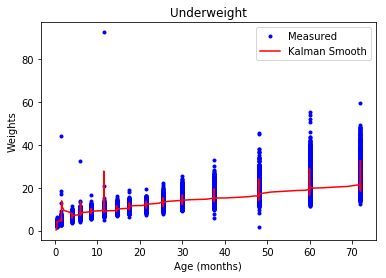

In [431]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Underweight")

In [432]:
idy = np.tile(tgts_1, len(colAge))

In [433]:
idy = idy[outliers]

In [434]:
mx = nx*(~idy)
my = ny*(~idy)

In [435]:
nx = nx*idy
ny = ny*idy

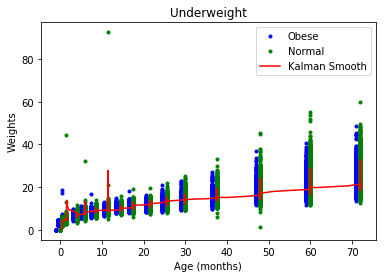

In [436]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Underweight")

In [510]:
nx = np.tile(colAge, len(group_2))
ny = np.array([group_2[i][16] for i in range(len(group_2))])


ny = ny.reshape((len(colSlot)*len(group_2),))

In [511]:
outliers = (ny<100) & (ny>1.)

In [512]:
nx = nx[outliers]
ny = ny[outliers]

In [513]:
data = np.array([nx,ny]).T

In [514]:
data = data[np.argsort(data[:, 0])]

In [442]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[ 0.04804008  0.00440829]
 [ 0.00440829  1.10584737]], shape = (2, 2)

observation_covariance = [[  2.86030697e-02  -1.59772421e-03]
 [ -1.59772421e-03   5.36747157e+00]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[  1.24543003e-02   4.05367077e-05]
 [  4.05367077e-05   1.88769366e-01]], shape = (2, 2)



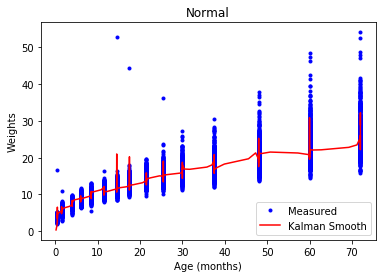

In [443]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Normal")

In [515]:
idy = np.tile(tgts_2, len(colAge))

In [516]:
idy = idy[outliers]

In [517]:
mx = nx*(~idy)
my = ny*(~idy)

In [518]:
nx = nx*idy
ny = ny*idy

In [522]:
mx.shape

(10746,)

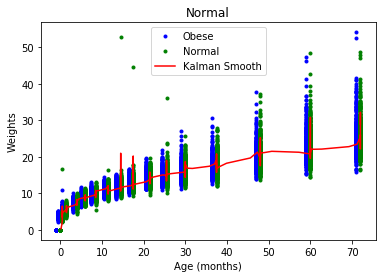

In [448]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Normal")

In [407]:
nx = np.tile(colAge, len(group_3))
ny = np.array([group_3[i][16] for i in range(len(group_3))])


ny = ny.reshape((len(colSlot)*len(group_3),))

In [408]:
outliers = (ny<100) & (ny>1.)

In [409]:
nx = nx[outliers]
ny = ny[outliers]

In [410]:
data = np.array([nx,ny]).T

In [411]:
data = data[np.argsort(data[:, 0])]

In [412]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[ 3.77330654  1.36016683]
 [ 1.36016683  6.50143478]], shape = (2, 2)

observation_covariance = [[  1.04832852  -0.15465251]
 [ -0.15465251  30.18081603]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[ 0.1273981   0.00353384]
 [ 0.00353384  0.31877158]], shape = (2, 2)



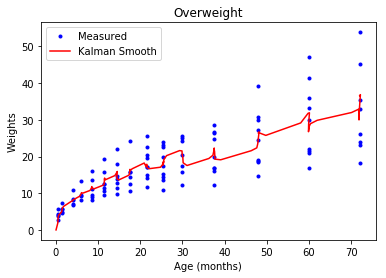

In [413]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Overweight")

In [414]:
idy = np.tile(tgts_3, len(colAge))

In [415]:
idy = idy[outliers]

In [416]:
mx = nx*(~idy)
my = ny*(~idy)

In [417]:
nx = nx*idy
ny = ny*idy

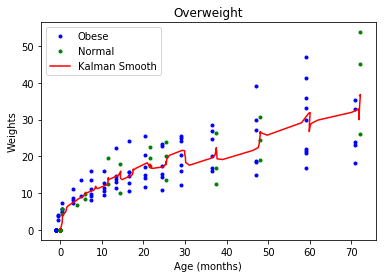

In [418]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Overweight")

In [491]:
nx = np.tile(colAge, len(group_4))
ny = np.array([group_4[i][16] for i in range(len(group_4))])


ny = ny.reshape((len(colSlot)*len(group_4),))

In [492]:
outliers = (ny<100) & (ny>1.)

In [493]:
nx = nx[outliers]
ny = ny[outliers]

In [494]:
data = np.array([nx,ny]).T

In [495]:
data = data[np.argsort(data[:, 0])]

In [496]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])

# Use EM algorithm to estimate the parameters
kf.em(data, n_iter=6)

# Give an obviously erroneous initial state
kf.initial_state_mean = np.array([0, 0])

# Print the parameters
print_parameters(kf)

transition_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

observation_matrices = [[ 1.  0.]
 [ 0.  1.]], shape = (2, 2)

transition_offsets = [ 0.  0.], shape = (2,)

observation_offsets = [ 0.  0.], shape = (2,)

transition_covariance = [[ 24.6151696    6.69718574]
 [  6.69718574   2.60711363]], shape = (2, 2)

observation_covariance = [[ 2.32017402  1.05504928]
 [ 1.05504928  1.73801725]], shape = (2, 2)

initial_state_mean = [0 0], shape = (2,)

initial_state_covariance = [[ 0.20986558  0.05075976]
 [ 0.05075976  0.11591357]], shape = (2, 2)



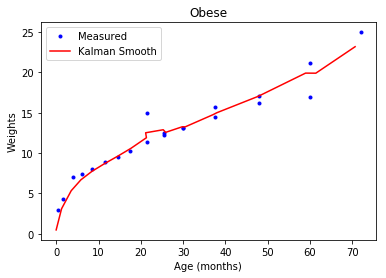

In [497]:
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
plot_kalman(nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "Obese")

In [498]:
idy = np.tile(tgts_4, len(colAge))

In [499]:
idy = idy[outliers]

In [500]:
mx = nx*(~idy)
my = ny*(~idy)

In [501]:
nx = nx*idy
ny = ny*idy

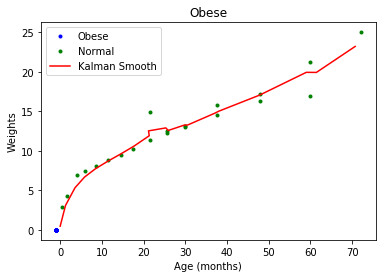

In [502]:
plot_kalman_tgts(nx-1,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], mx, my, "Obese")

In [504]:
next_mean, next_covariance = kf.filter_update(
    15, 1, 80
)

In [506]:
next_covariance

array([[ 2.07453399,  0.78135721],
       [ 0.78135721,  1.0441915 ]])